# Projeto final de Data Science da Infinity  
> aluno: Walter Alves da Silva

## import de bibilhotecas e dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## limpeza de dados

### limpesa de dados desnescesarios

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.drop(['Transaction ID','Customer ID'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1000 non-null   object
 1   Gender            1000 non-null   object
 2   Age               1000 non-null   int64 
 3   Product Category  1000 non-null   object
 4   Quantity          1000 non-null   int64 
 5   Price per Unit    1000 non-null   int64 
 6   Total Amount      1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


### engenharia de caracteristicas

#### Convertendo generos para binario

In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
gender = {'Male': 1,'Female': 0}
df.Gender = [gender[item] for item in df.Gender]
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,1,34,Beauty,3,50,150
1,2023-02-27,0,26,Clothing,2,500,1000
2,2023-01-13,1,50,Electronics,1,30,30
3,2023-05-21,1,37,Clothing,1,500,500
4,2023-05-06,1,30,Beauty,2,50,100


#### convertendo a coluna Data para o formato data e depois para dia do ano 

In [10]:
df['Date'].unique()

array(['2023-11-24', '2023-02-27', '2023-01-13', '2023-05-21',
       '2023-05-06', '2023-04-25', '2023-03-13', '2023-02-22',
       '2023-12-13', '2023-10-07', '2023-02-14', '2023-10-30',
       '2023-08-05', '2023-01-17', '2023-01-16', '2023-02-17',
       '2023-04-22', '2023-04-30', '2023-09-16', '2023-11-05',
       '2023-01-14', '2023-10-15', '2023-04-12', '2023-11-29',
       '2023-12-26', '2023-08-03', '2023-04-23', '2023-08-18',
       '2023-10-29', '2023-05-23', '2023-01-04', '2023-03-23',
       '2023-12-24', '2023-06-24', '2023-03-21', '2023-04-21',
       '2023-06-22', '2023-07-14', '2023-02-19', '2023-07-03',
       '2023-06-26', '2023-11-06', '2023-05-16', '2023-01-23',
       '2023-08-24', '2023-10-02', '2023-03-05', '2023-07-13',
       '2023-02-10', '2023-10-10', '2023-05-31', '2023-11-18',
       '2023-11-13', '2023-07-05', '2023-10-23', '2023-04-09',
       '2023-12-27', '2023-02-05', '2023-01-24', '2023-12-05',
       '2023-04-27', '2023-05-29', '2023-02-21', '2023-

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   int64         
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 54.8+ KB


In [13]:
df["Date"] = df['Date'].apply(lambda x:x.dayofyear)
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,328,1,34,Beauty,3,50,150
1,58,0,26,Clothing,2,500,1000
2,13,1,50,Electronics,1,30,30
3,141,1,37,Clothing,1,500,500
4,126,1,30,Beauty,2,50,100


considerando que se trata de dataset de compras, é de se esperar um padrão de repetição anual,  
por isso decidi converter a data para dia do ano, outro fator que me fez tomar a decisão  
é o fato de que todos os dados são do mesmo ano.

### regularizando variaveis categoricas

In [14]:
from sklearn.preprocessing import OneHotEncoder

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

df


,Date,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,328,1,34,3,50,150,1.0,0.0,0.0
1,58,0,26,2,500,1000,0.0,1.0,0.0
2,13,1,50,1,30,30,0.0,0.0,1.0
3,141,1,37,1,500,500,0.0,1.0,0.0
4,126,1,30,2,50,100,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,136,1,62,1,50,50,0.0,1.0,0.0
996,321,1,52,3,30,90,1.0,0.0,0.0
997,302,0,23,4,25,100,1.0,0.0,0.0
998,339,0,36,3,50,150,0.0,0.0,1.0


usando o OneHotEncoder para separar as categorias de brodutos em colunas binarias, dessa forma posso usar para treinar um modelo  
fonte: https://www.geeksforgeeks.org/ml-one-hot-encoding/

## analise exploratoria

### funçoes para plot

In [15]:
def grafico_pizza(agrupadora:str, agrupada:str, nomes: list, titulo:str):
    """tem a função de criar um grafico pizza

    Args:
        agrupadora (str): coluna que vai ser as categorias
        agrupada (str): valores da categoria
        nomes (list): labels das categorias
        titulo (str): titulo do grafico
    """
    df_por_genero = df[[agrupadora, agrupada]]
    df_por_genero = df_por_genero.groupby(agrupadora, as_index=False).sum()

    # Extraindo as séries de categoria e valor
    categorias = df_por_genero[agrupadora].to_numpy()
    valores = df_por_genero[agrupada].to_numpy()

    # Criando o gráfico de pizza
    plt.figure(figsize=(2, 2))  # Definindo o tamanho do gráfico
    plt.pie(
        valores, labels=nomes, autopct="%1.1f%%", startangle=90
    )  # Criando o gráfico
    plt.title(titulo)  # Título do gráfico
    plt.axis("equal")  # Garantindo que o gráfico seja circular
    # Mostrando o gráfico
    plt.show()

In [16]:
def grafico_linha(x:str,y:str,titulo:str):
    """_summary_

    Args:
        x (str): eixo X
        y (str):eixo Y
        titulo (str): titulo do grafico
    """
    df_graf = df[[x,y]]
    df_graf = df_graf.groupby(x,as_index=False).sum()

    x = df_graf[x]
    y = df_graf[y]

    plt.figure(figsize=(15, 6))  
    plt.plot(x, y, linestyle='-') 
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)

    plt.xticks(rotation=45) 

    plt.tight_layout()
    plt.show()

### grafico valor Total X Dia

In [17]:
df_por_data = df[['Date','Quantity','Price per Unit','Total Amount']]
df_por_data = df_por_data.groupby('Date',as_index=False).sum()
df_por_data.head()


,Date,Quantity,Price per Unit,Total Amount
0,1,14,1630,5130
1,2,10,605,1765
2,3,2,300,600
3,4,8,580,1240
4,5,5,575,1100


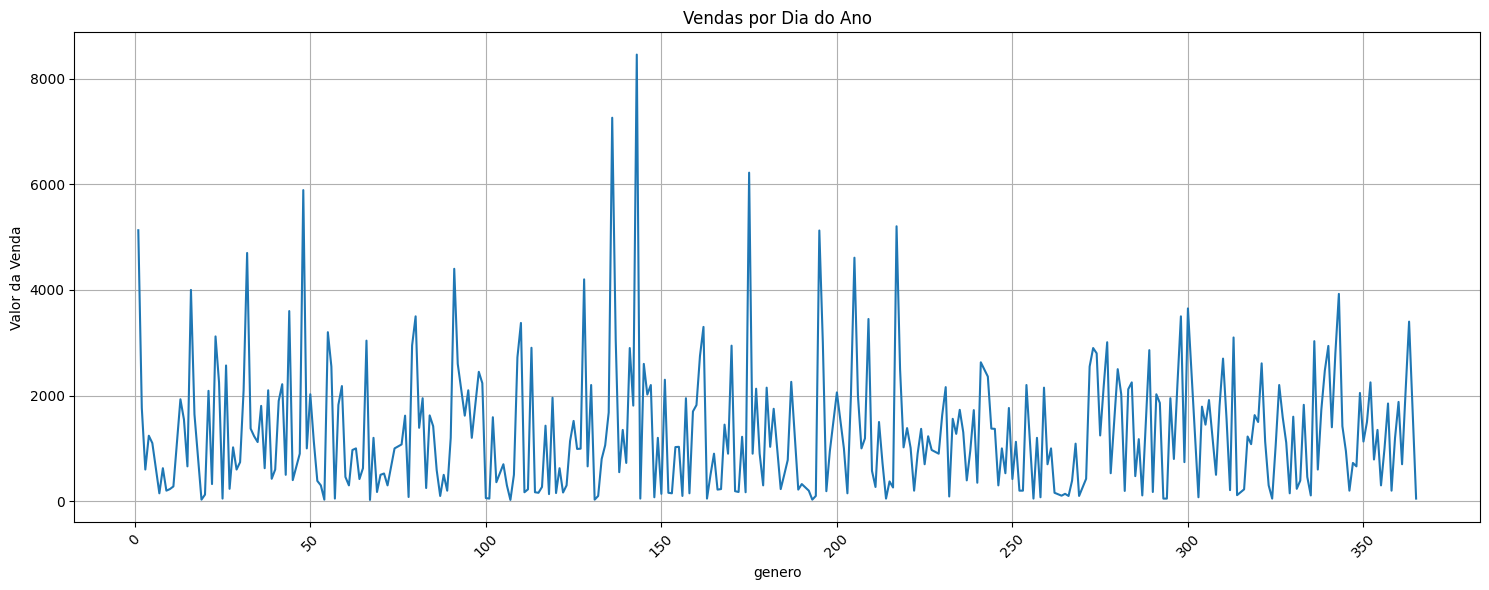

In [18]:
# Extraindo as séries de data e venda
datas = df_por_data["Date"]
vendas = df_por_data["Total Amount"]

# Criando o gráfico de linhas
plt.figure(figsize=(15, 6))  # Definindo o tamanho do gráfico
plt.plot(datas, vendas, linestyle='-')  # Criando a linha e definindo estilo
plt.title("Vendas por Dia do Ano")  # Título do gráfico
plt.xlabel("genero")  # Rótulo do eixo X
plt.ylabel("Valor da Venda")  # Rótulo do eixo Y
plt.grid(True)  # Exibindo grid no gráfico

# Formatando as datas no eixo X
plt.xticks(rotation=45)  # Rotacionando os rótulos das datas para melhor visualização

# Mostrando o gráfico
plt.tight_layout()
plt.show()

não é notado um padrão de compra, provavelmente isso se da ao fato de ser um dataset ficticio

### venda por genero

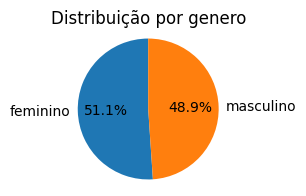

In [19]:
df_por_genero = df[['Gender','Total Amount']]
df_por_genero = df_por_genero.groupby('Gender',as_index=False).sum()
df_por_genero.head()

# Extraindo as séries de categoria e valor
categorias = df_por_genero["Gender"].to_numpy()
valores = df_por_genero["Total Amount"].to_numpy()

# Criando o gráfico de pizza
plt.figure(figsize=(2, 2))  # Definindo o tamanho do gráfico
plt.pie(valores, labels=['feminino','masculino'], autopct="%1.1f%%", startangle=90)  # Criando o gráfico
plt.title("Distribuição por genero")  # Título do gráfico
plt.axis('equal')  # Garantindo que o gráfico seja circular

# Mostrando o gráfico
plt.show()

as vendas variam em 2,2% entre os generos, ao meu ver não é uma diferença consideravel, e o fato de ser um dataset artificial pode ter influenciado

### grafico idade X venda

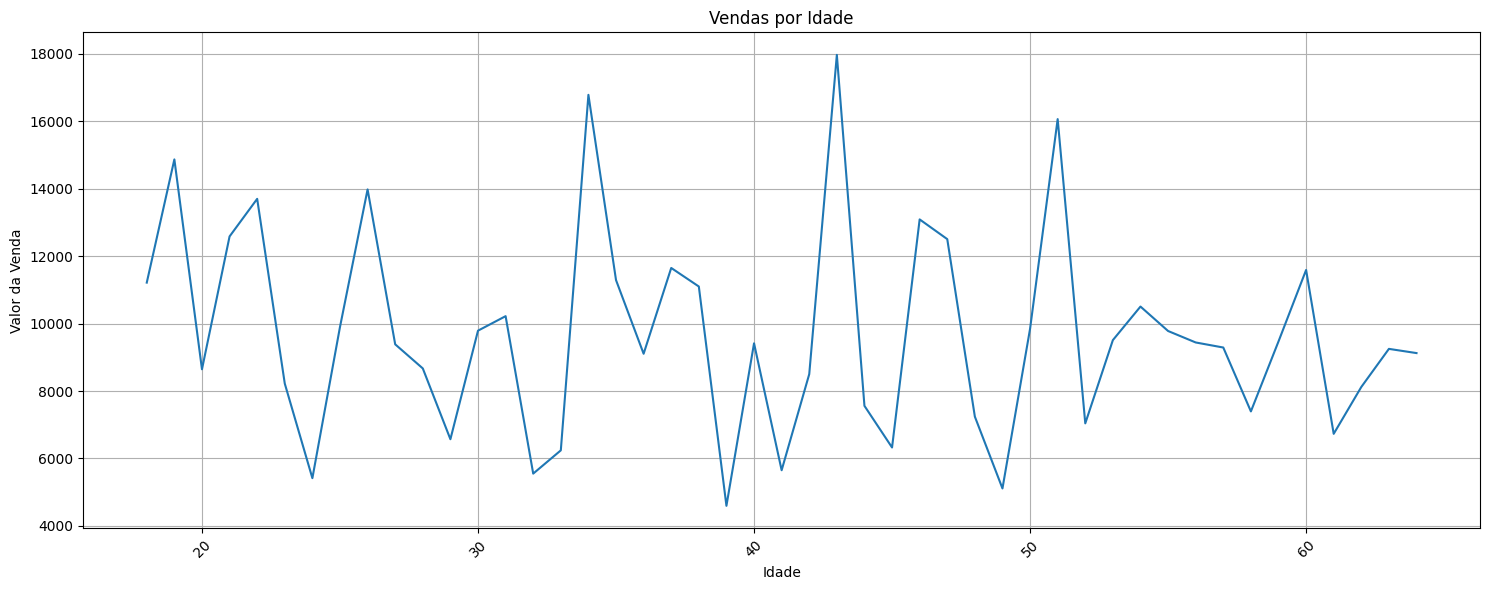

In [20]:
df_por_data = df[['Age','Total Amount']]
df_por_data = df_por_data.groupby('Age',as_index=False).sum()
df_por_data.head()

x = df_por_data["Age"]
y = df_por_data["Total Amount"]

plt.figure(figsize=(15, 6))  
plt.plot(x, y, linestyle='-') 
plt.title("Vendas por Idade")
plt.xlabel("Idade")
plt.ylabel("Valor da Venda")
plt.grid(True)

plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

novamente nenhum padrão, esse dataset é muito sintetico, sera possivel treinar um modelo?'

### genero por categoria

In [21]:
df.columns

Index(['Date', 'Gender', 'Age', 'Quantity', 'Price per Unit', 'Total Amount',
       'Product Category_Beauty', 'Product Category_Clothing',
       'Product Category_Electronics'],
      dtype='object')

In [22]:
df_por_data = df[
    [
        "Gender",
        "Total Amount",
        "Product Category_Beauty",
        "Product Category_Clothing",
        "Product Category_Electronics",
    ]
]
df_por_data = df_por_data.groupby("Gender", as_index=False).sum()
df_por_data

,Gender,Total Amount,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,0,232840,166.0,174.0,170.0
1,1,223160,141.0,177.0,172.0


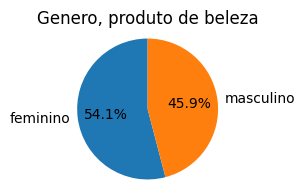

In [23]:
grafico_pizza('Gender','Product Category_Beauty',['feminino','masculino'], 'Genero, produto de beleza')

notorio que as mulheres compram mais produtos de beleza, como esperado

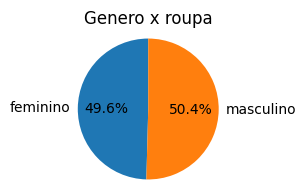

In [24]:
grafico_pizza('Gender','Product Category_Clothing',['feminino','masculino'], 'Genero x roupa')

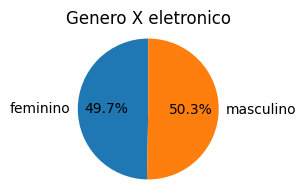

In [25]:
grafico_pizza('Gender','Product Category_Electronics',['feminino','masculino'], 'Genero X eletronico')

### idade X categoria

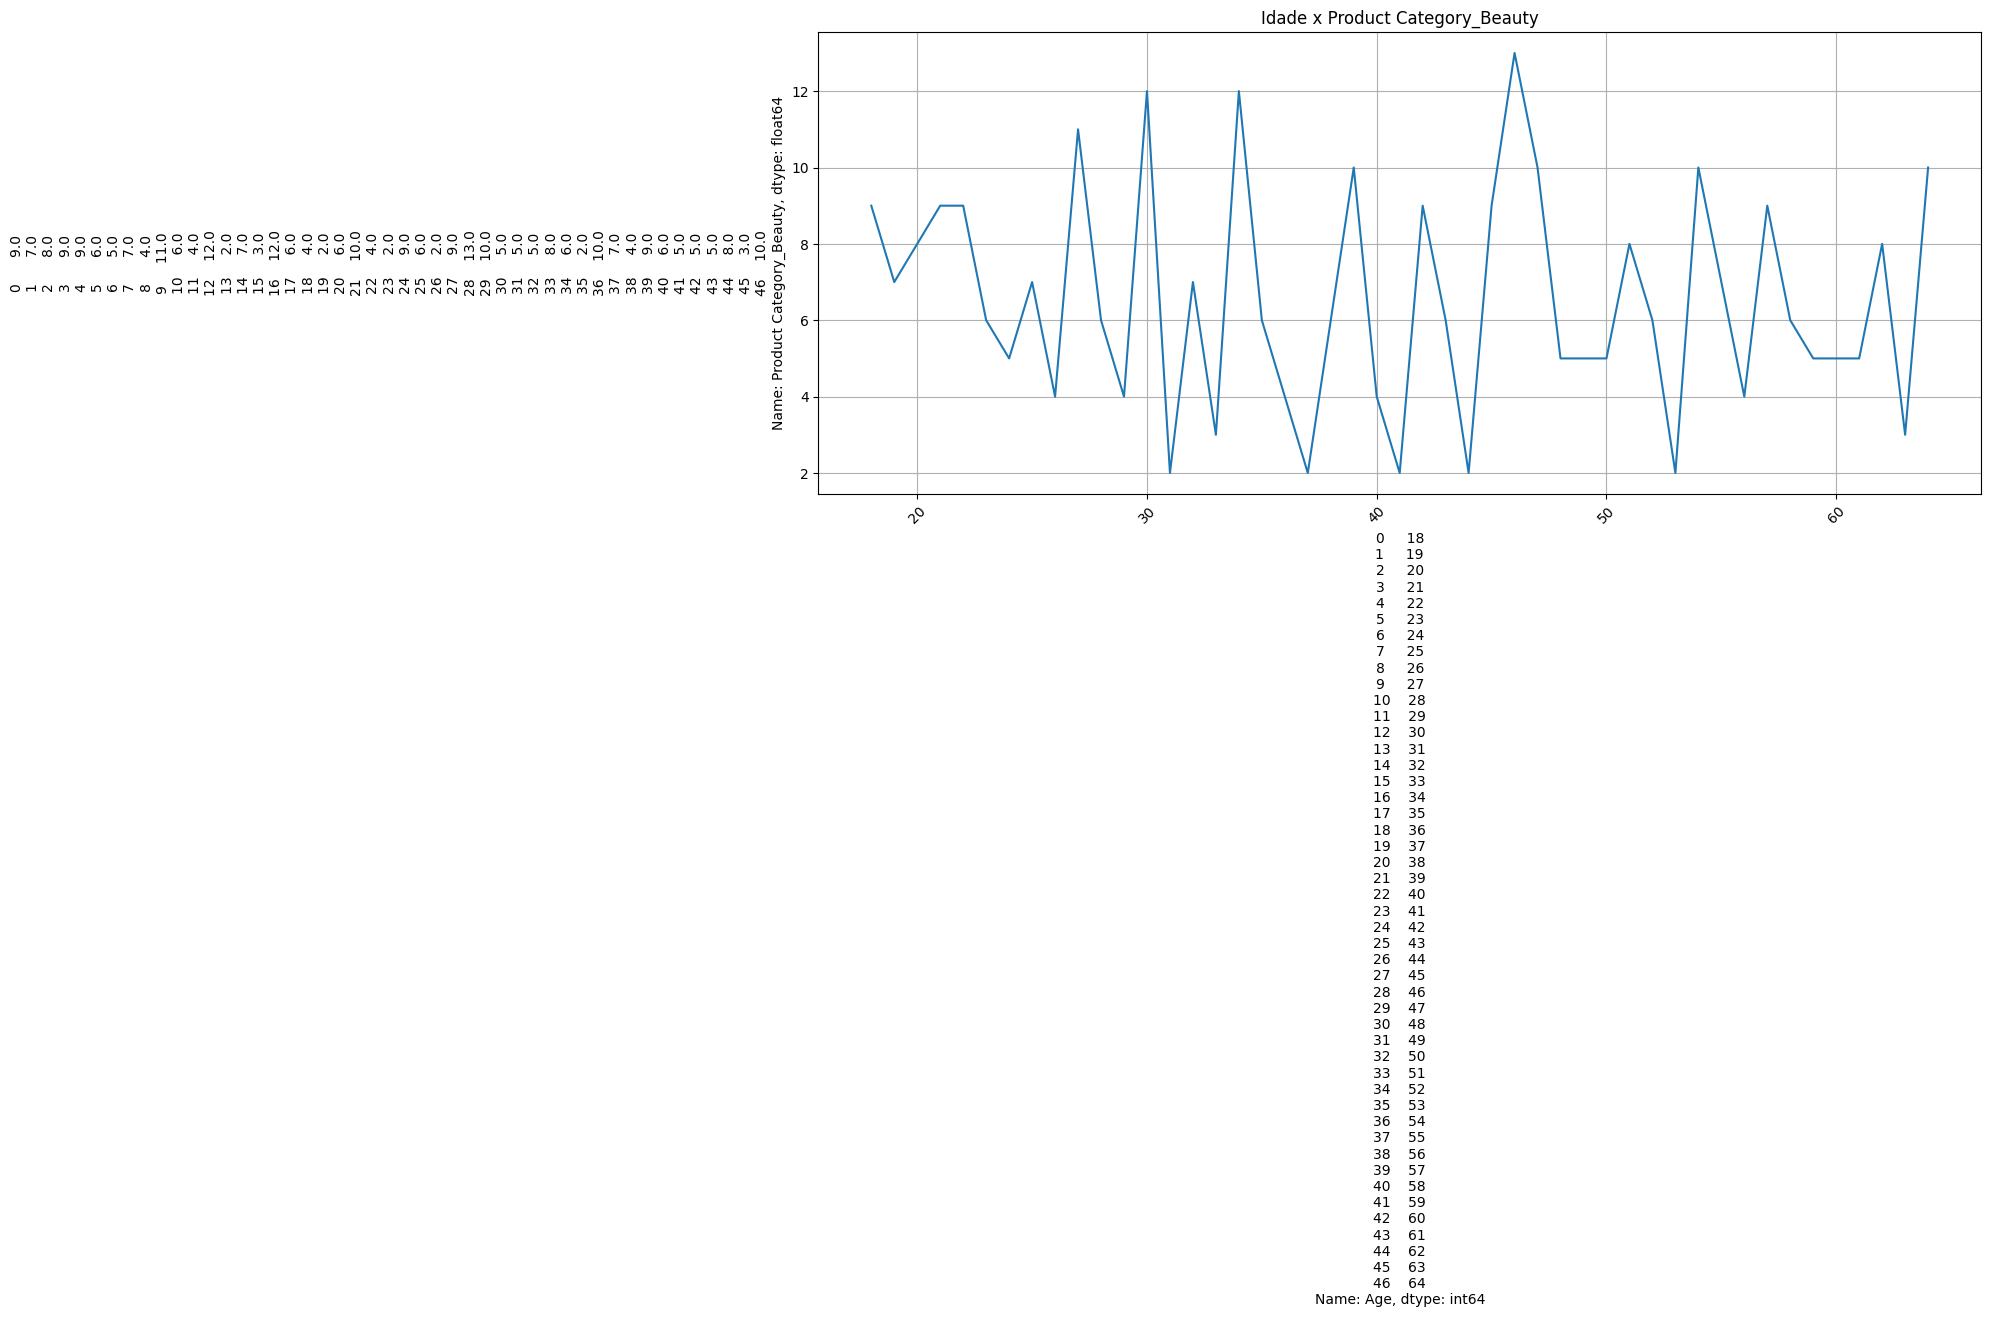

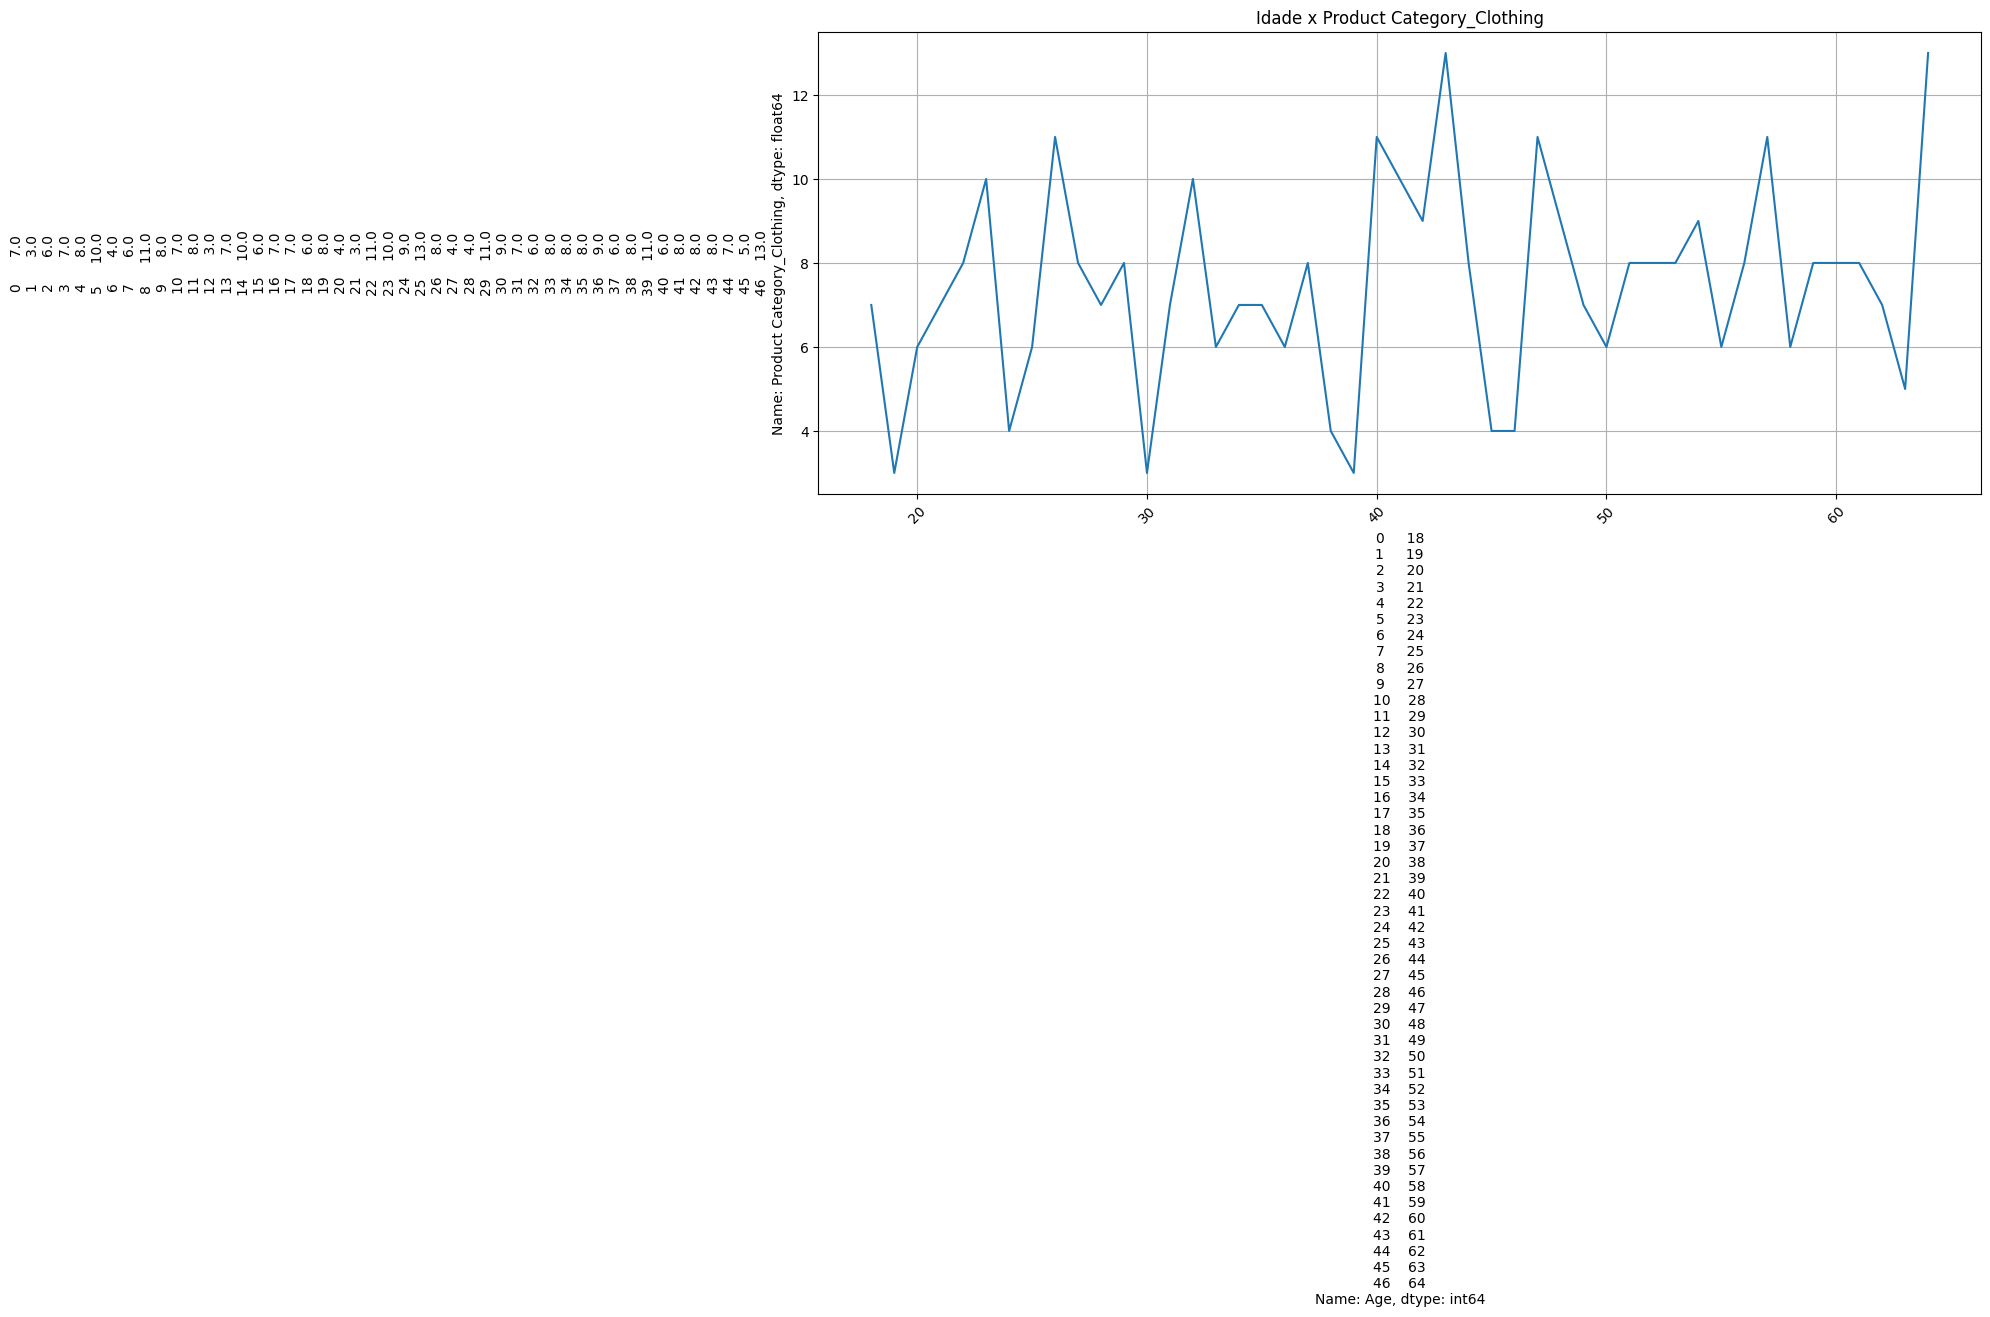

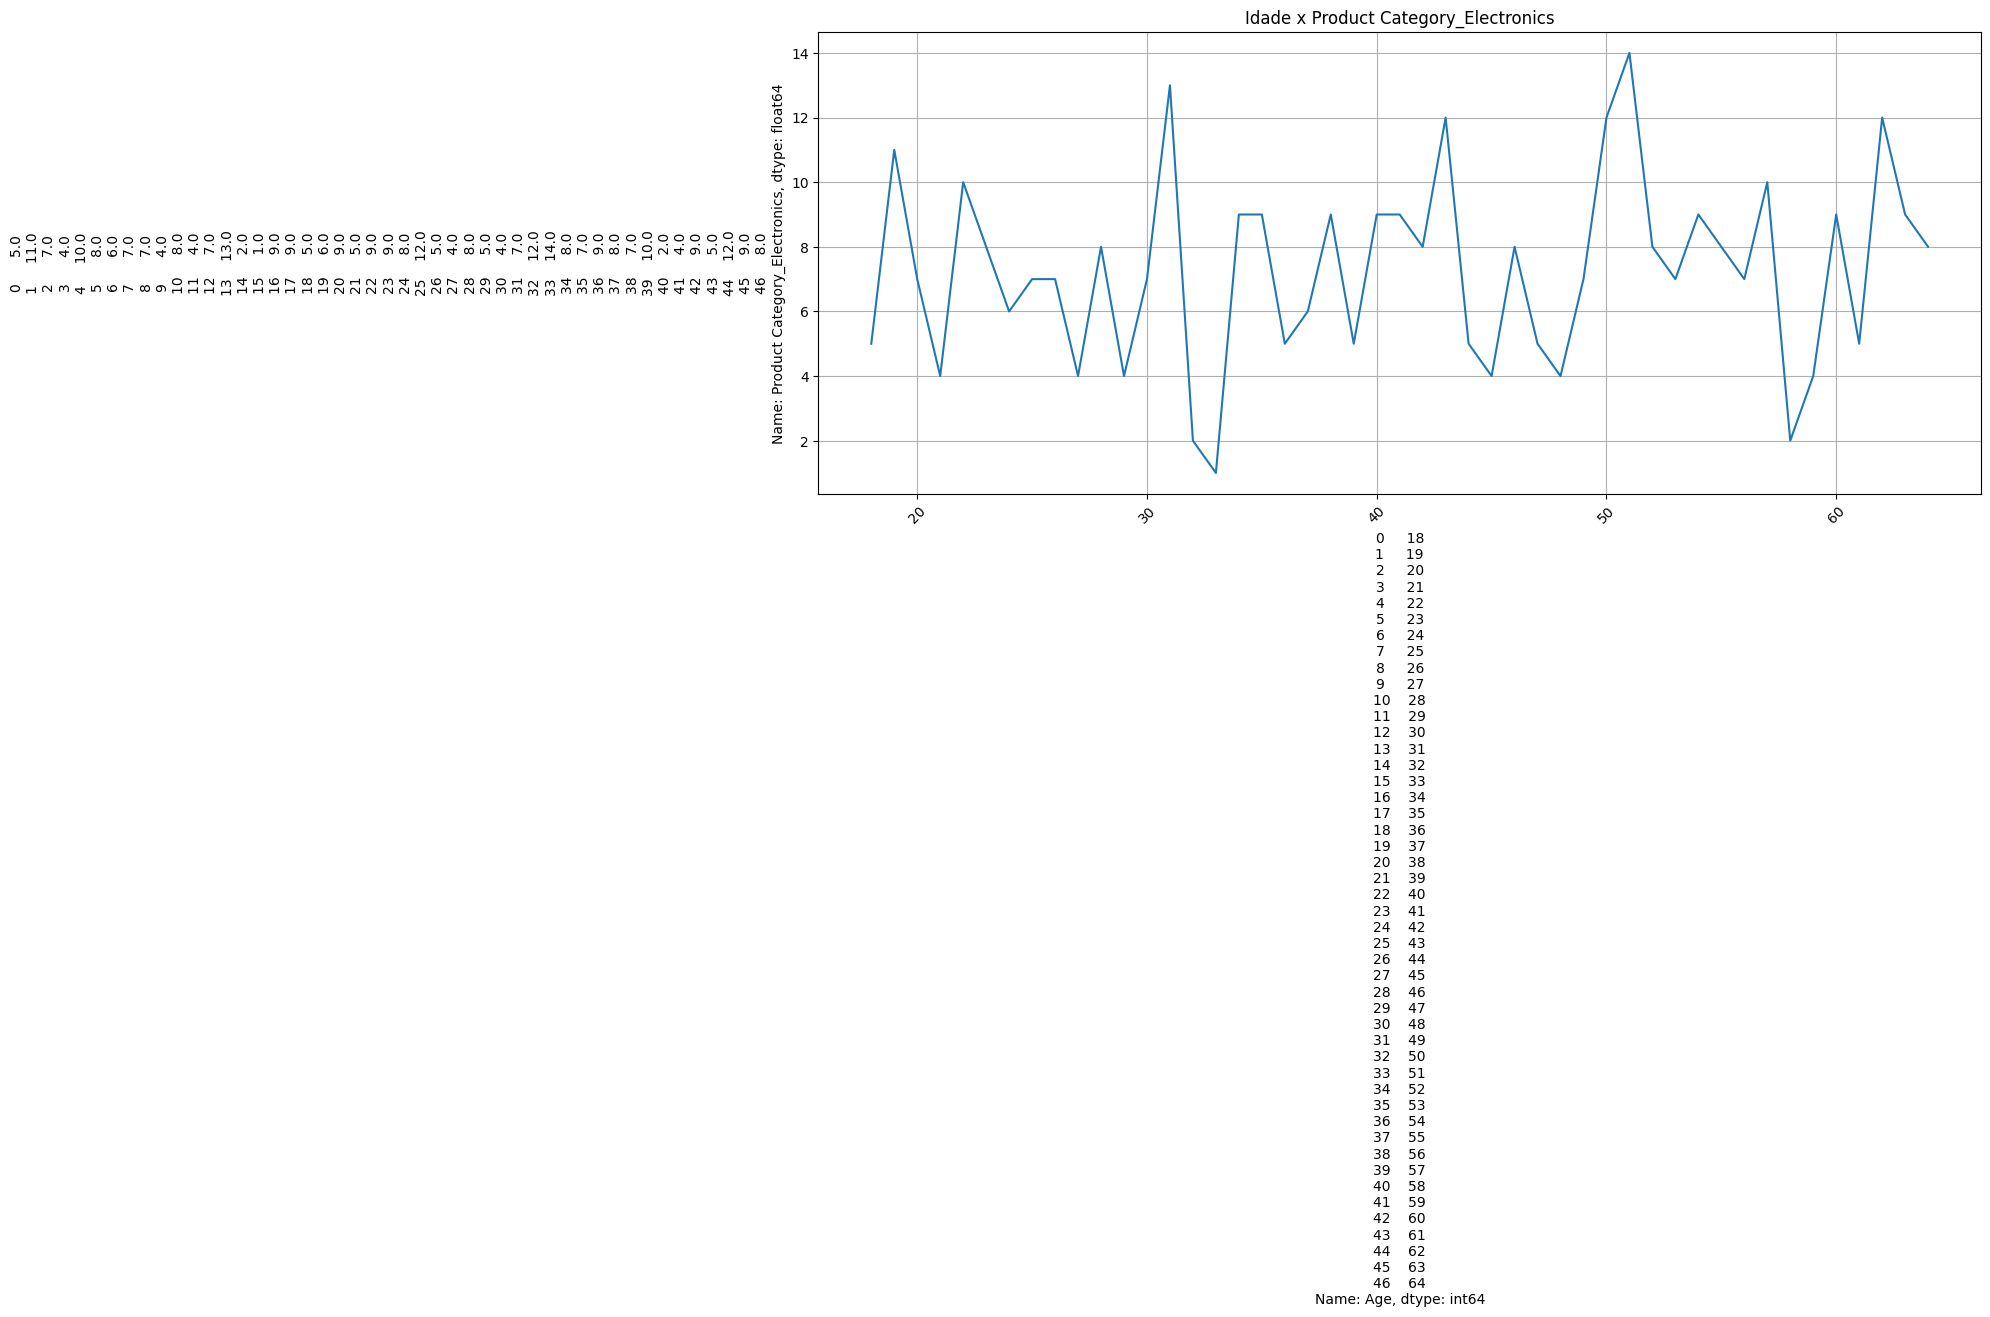

In [26]:
for categoria in ['Product Category_Beauty', 'Product Category_Clothing','Product Category_Electronics']:
    grafico_linha('Age',categoria,f'Idade x {categoria}')

nenhum padrão observado

### correlação

In [27]:
import seaborn as sns

In [28]:
corr_matrix = df.corr()
corr_matrix

,Date,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
Date,1.000000,-0.032682,0.002364,-0.019206,-0.006681,-0.001961,-0.007714,-0.078373,0.086354
Gender,-0.032682,1.000000,0.002621,-0.028023,-0.000961,-0.001001,-0.040897,0.020998,0.018639
Age,0.002364,0.002621,1.000000,-0.023737,-0.038423,-0.060568,-0.049679,0.029940,0.018181
Quantity,-0.019206,-0.028023,-0.023737,1.000000,0.017501,0.373707,-0.001528,0.021441,-0.020086
Price per Unit,-0.006681,-0.000961,-0.038423,0.017501,1.000000,0.851925,0.014623,-0.021731,0.007646
Total Amount,-0.001961,-0.001001,-0.060568,0.373707,0.851925,1.000000,0.013646,-0.016755,0.003589
Product Category_Beauty,-0.007714,-0.040897,-0.049679,-0.001528,0.014623,0.013646,1.000000,-0.489479,-0.479847
Product Category_Clothing,-0.078373,0.020998,0.029940,0.021441,-0.021731,-0.016755,-0.489479,1.000000,-0.530190
Product Category_Electronics,0.086354,0.018639,0.018181,-0.020086,0.007646,0.003589,-0.479847,-0.530190,1.000000


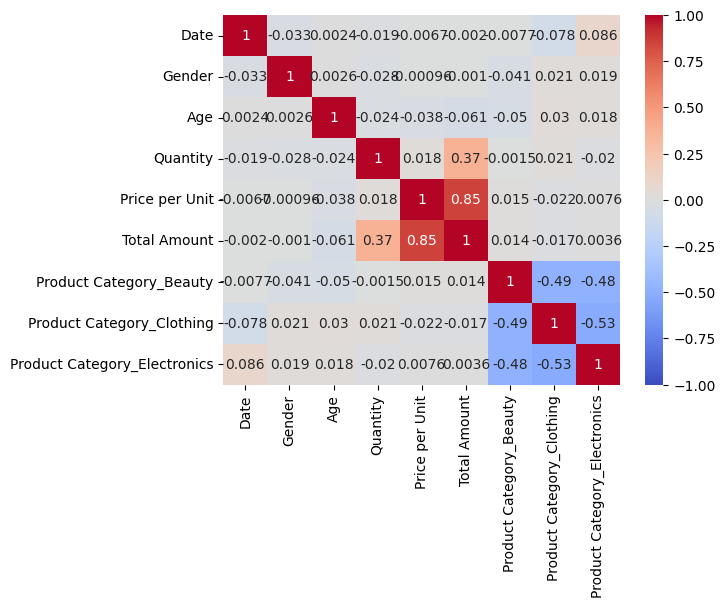

In [29]:
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.show()

### resumo

considerando as informaçoes extraidads dos graficos notase que não é possivel obter uma corelação entre os valores   
exceto genetro por venda de produto de beleza.

## modelo Machine Learning

### import e escalonamento

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [31]:
x = df.drop(columns = [ 'Quantity', 'Price per Unit', 'Total Amount'])
y = df['Total Amount']

escalonador = StandardScaler()
x_escalonado = escalonador.fit_transform(x)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_escalonado, y)

# ['Date', 'Gender', 'Age', 'Quantity', 'Price per Unit', 'Total Amount','Product Category_Beauty', 'Product Category_Clothing','Product Category_Electronics']

### regressor linear

In [32]:
regressor = LinearRegression()
regressor.fit(x_treino, y_treino)

LinearRegression()

In [33]:
previsao = regressor.predict(x_teste)
previsao

array([511.38384892, 407.46000809, 506.92639012, 506.41777963,
       378.18811885, 530.95524523, 524.1810334 , 509.37532314,
       405.89979333, 528.75309357, 505.76326458, 553.00929934,
       465.88058293, 539.00524392, 407.72727141, 458.88418272,
       379.35989466, 519.46448615, 426.82273077, 540.54104883,
       486.46310749, 537.60214155, 551.67846409, 445.6494205 ,
       440.25636993, 536.7680851 , 435.07486963, 418.26862618,
       538.82163866, 544.07403574, 437.25247547, 430.46705581,
       504.62605519, 492.27594737, 403.15388806, 497.62383419,
       411.9612603 , 391.69553143, 416.47690174, 556.46864879,
       452.58538528, 446.652557  , 407.00062521, 458.02085807,
       464.58749552, 408.5044684 , 378.07933826, 450.0044962 ,
       398.26547292, 416.91324511, 492.37734671, 467.49051319,
       523.15516215, 513.89299344, 529.34849638, 467.6636571 ,
       382.31200397, 491.29722072, 384.82048997, 551.77134912,
       440.758359  , 439.41750314, 506.06704137, 426.36

In [34]:
mse = mean_squared_error(y_teste, previsao)
mse

289935.1391641388

### regressor Perceptron

In [35]:
regressor = Perceptron()
regressor.fit(x_treino, y_treino)

Perceptron()

In [36]:
previsao = regressor.predict(x_teste)
previsao

array([  50,  600,   50,   50,  600, 1500, 1500,   50,  600, 1500,   25,
         50,  900,   30,  600,  200,  900,   50,   50, 1500,   30,   30,
         50,  900,   50,   50,  600,  120, 1500, 1500,  600,  120,   25,
         30,  600,   30,  900,  120,  900,   50,   30,   30,  900,   50,
         30,   50,  600,   25,   50,  120, 1500,   30, 1500, 1500,   30,
         30,  900,   50,  600, 1500,  200,   30,   30,  900,   50,   25,
         75,   50,  200,   30,  100,  900,  600,   75,   25,   50,  500,
        200,   30, 1500,  900, 1500,   30,   50, 1500,   30,   50,   30,
         30,  600,  120,   30,   50,  600,   50,   50, 1500,   25,   50,
         50,   50,   50,   50,  900,  120,   75,   50, 1500,  900,   25,
         75,  120,  600,   30,   50,   25,  120, 1500, 1500,   30,   30,
         30,   50,   25,   50,  900,   50, 1500,   50,  600,  600,   50,
        100,   50,  600,   50,  900,  900,  500,   50,  120,   50,   50,
         30,   30, 1500,  900,  120,  100,  120,   

In [37]:
mse = mean_squared_error(y_teste, previsao)
mse

464630.2

### outro regressor

notase um erro muito grande, isso acontesse por que o dataset analisado foi gerado aleatoriamente, como observado pela anasile exploratoria,  
o machine learning tem como objetivo buscar padroes, e como no caso não ouve padrão, é de se esperar que o computador não consiga o seu objetivo.